In [1]:
import numpy as np
import pandas as pd

In [2]:
berkeley = pd.read_csv('berkeley.csv', engine="python")
berkeley.head()

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19
4,Admitted,Male,B,353


In [3]:
berkeley

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19
4,Admitted,Male,B,353
5,Rejected,Male,B,207
6,Admitted,Female,B,17
7,Rejected,Female,B,8
8,Admitted,Male,C,120
9,Rejected,Male,C,205


In [6]:
def admit(x):
    if x =="Admitted":
        return 1
    else:
        return 0
    
berkeley['number_Admit'] = berkeley['Admit'].apply(admit)
berkeley['number_Admit'].head()

0    1
1    0
2    1
3    0
4    1
Name: number_Admit, dtype: int64

In [8]:
berkeley.groupby('Gender')['number_Admit'].mean()

Gender
Female    0.5
Male      0.5
Name: number_Admit, dtype: float64

In [11]:
berkeley_male = berkeley[berkeley['Gender']=='Male']
berkeley_female = berkeley[berkeley['Gender']=='Female']
berkeley_male.tail()

,Admit,Gender,Dept,Freq,number_Admit
13,Rejected,Male,D,279,0
16,Admitted,Male,E,53,1
17,Rejected,Male,E,138,0
20,Admitted,Male,F,22,1
21,Rejected,Male,F,351,0


In [14]:
applicants_male = berkeley_male['Freq'].sum()
applicants_female = berkeley_female['Freq'].sum()

In [20]:
accepted_male = np.sum(berkeley_male['Freq'] * berkeley_male['number_Admit']) / applicants_male * 100
accepted_female = np.sum(berkeley_female['Freq'] * berkeley_female['number_Admit']) / applicants_female * 100

print("Male accpetance rate is %.2f and female rate is %.2f" % (accepted_male, accepted_female))

Male accpetance rate is 44.52 and female rate is 30.35


In [21]:
accepted = berkeley[berkeley['number_Admit']==1]
rejected = berkeley[berkeley['number_Admit']==0]
accepted.head()

,Admit,Gender,Dept,Freq,number_Admit
0,Admitted,Male,A,512,1
2,Admitted,Female,A,89,1
4,Admitted,Male,B,353,1
6,Admitted,Female,B,17,1
8,Admitted,Male,C,120,1


In [22]:
accepted

,Admit,Gender,Dept,Freq,number_Admit
0,Admitted,Male,A,512,1
2,Admitted,Female,A,89,1
4,Admitted,Male,B,353,1
6,Admitted,Female,B,17,1
8,Admitted,Male,C,120,1
10,Admitted,Female,C,202,1
12,Admitted,Male,D,138,1
14,Admitted,Female,D,131,1
16,Admitted,Male,E,53,1
18,Admitted,Female,E,94,1


In [23]:
total_accepted = accepted['Freq'].sum()

In [24]:
accepted.groupby('Gender')['Freq'].sum()['Gender']

Gender
Female     557
Male      1198
Name: Freq, dtype: int64

In [26]:
print("Among the admitted applicants, male made up for %.2f%% and female for %.2f%%" % (1198*100/total_accepted, 557*100/total_accepted))

Among the admitted applicants, male made up for 68.26% and female for 31.74%


In [29]:
berkeley_A = berkeley[berkeley['Dept']=='A']
berkeley_B = berkeley[berkeley['Dept']=='B']
berkeley_C = berkeley[berkeley['Dept']=='C']
berkeley_D = berkeley[berkeley['Dept']=='D']
berkeley_E = berkeley[berkeley['Dept']=='E']
berkeley_F = berkeley[berkeley['Dept']=='F']

In [30]:
berkeley_A

,Admit,Gender,Dept,Freq,number_Admit
0,Admitted,Male,A,512,1
1,Rejected,Male,A,313,0
2,Admitted,Female,A,89,1
3,Rejected,Female,A,19,0


In [31]:
berkeley_A_acceptance_rate = np.sum(berkeley_A['Freq'] * berkeley_A['number_Admit']) / berkeley_A['Freq'].sum()
berkeley_B_acceptance_rate = np.sum(berkeley_B['Freq'] * berkeley_B['number_Admit']) / berkeley_B['Freq'].sum()
berkeley_C_acceptance_rate = np.sum(berkeley_C['Freq'] * berkeley_C['number_Admit']) / berkeley_C['Freq'].sum()
berkeley_D_acceptance_rate = np.sum(berkeley_D['Freq'] * berkeley_D['number_Admit']) / berkeley_D['Freq'].sum()
berkeley_E_acceptance_rate = np.sum(berkeley_E['Freq'] * berkeley_E['number_Admit']) / berkeley_E['Freq'].sum()
berkeley_F_acceptance_rate = np.sum(berkeley_F['Freq'] * berkeley_F['number_Admit']) / berkeley_F['Freq'].sum()

In [37]:
print("The acceptance rate for each department is:")
print()
print("A: %.2f%%" % (100*berkeley_A_acceptance_rate))
print("B: %.2f%%" % (100*berkeley_E_acceptance_rate))
print("C: %.2f%%" % (100*berkeley_C_acceptance_rate))
print("D: %.2f%%" % (100*berkeley_D_acceptance_rate))
print("E: %.2f%%" % (100*berkeley_E_acceptance_rate))
print("F: %.2f%%" % (100*berkeley_F_acceptance_rate))

The acceptance rate for each department is:

A: 64.42%
B: 25.17%
C: 35.08%
D: 33.96%
E: 25.17%
F: 6.44%


In [39]:
berkeley_A_male = berkeley_A[berkeley_A['Gender']=="Male"]
berkeley_A_female = berkeley_A[berkeley_A['Gender']=="Female"]

print("total rate for A: %.2f%%" % (100*berkeley_A_acceptance_rate))
print("male rate for A: %.2f%%" % (100*berkeley_A_male[berkeley_A_male["number_Admit"]==1]['Freq'].sum()/berkeley_A_male["Freq"].sum()))
print("female rate for A: %.2f%%" % (100*berkeley_A_female[berkeley_A_female["number_Admit"]==1]['Freq'].sum()/berkeley_A_female["Freq"].sum()))

total rate for A: 64.42%
male rate for A: 62.06%
female rate for A: 82.41%


In [40]:
berkeley_B_male = berkeley_B[berkeley_B['Gender']=="Male"]
berkeley_B_female = berkeley_B[berkeley_B['Gender']=="Female"]

print("total rate for B: %.2f%%" % (100*berkeley_B_acceptance_rate))
print("male rate for B: %.2f%%" % (100*berkeley_B_male[berkeley_B_male["number_Admit"]==1]['Freq'].sum()/berkeley_B_male["Freq"].sum()))
print("female rate for B: %.2f%%" % (100*berkeley_B_female[berkeley_B_female["number_Admit"]==1]['Freq'].sum()/berkeley_B_female["Freq"].sum()))

total rate for B: 63.25%
male rate for B: 63.04%
female rate for B: 68.00%


In [41]:
berkeley_C_male = berkeley_C[berkeley_C['Gender']=="Male"]
berkeley_C_female = berkeley_C[berkeley_C['Gender']=="Female"]

print("total rate for C: %.2f%%" % (100*berkeley_C_acceptance_rate))
print("male rate for C: %.2f%%" % (100*berkeley_C_male[berkeley_C_male["number_Admit"]==1]['Freq'].sum()/berkeley_C_male["Freq"].sum()))
print("female rate for C: %.2f%%" % (100*berkeley_C_female[berkeley_C_female["number_Admit"]==1]['Freq'].sum()/berkeley_C_female["Freq"].sum()))

total rate for C: 35.08%
male rate for C: 36.92%
female rate for C: 34.06%


In [42]:
berkeley_D_male = berkeley_D[berkeley_D['Gender']=="Male"]
berkeley_D_female = berkeley_D[berkeley_D['Gender']=="Female"]

print("total rate for D: %.2f%%" % (100*berkeley_D_acceptance_rate))
print("male rate for D: %.2f%%" % (100*berkeley_D_male[berkeley_D_male["number_Admit"]==1]['Freq'].sum()/berkeley_D_male["Freq"].sum()))
print("female rate for D: %.2f%%" % (100*berkeley_D_female[berkeley_D_female["number_Admit"]==1]['Freq'].sum()/berkeley_D_female["Freq"].sum()))

total rate for D: 33.96%
male rate for D: 33.09%
female rate for D: 34.93%


In [43]:
berkeley_E_male = berkeley_E[berkeley_E['Gender']=="Male"]
berkeley_E_female = berkeley_E[berkeley_E['Gender']=="Female"]

print("total rate for C: %.2f%%" % (100*berkeley_E_acceptance_rate))
print("male rate for C: %.2f%%" % (100*berkeley_E_male[berkeley_E_male["number_Admit"]==1]['Freq'].sum()/berkeley_E_male["Freq"].sum()))
print("female rate for C: %.2f%%" % (100*berkeley_E_female[berkeley_E_female["number_Admit"]==1]['Freq'].sum()/berkeley_E_female["Freq"].sum()))

total rate for C: 25.17%
male rate for C: 27.75%
female rate for C: 23.92%


In [44]:
berkeley_F_male = berkeley_F[berkeley_F['Gender']=="Male"]
berkeley_F_female = berkeley_F[berkeley_F['Gender']=="Female"]

print("total rate for F: %.2f%%" % (100*berkeley_F_acceptance_rate))
print("male rate for F: %.2f%%" % (100*berkeley_F_male[berkeley_F_male["number_Admit"]==1]['Freq'].sum()/berkeley_F_male["Freq"].sum()))
print("female rate for F: %.2f%%" % (100*berkeley_F_female[berkeley_F_female["number_Admit"]==1]['Freq'].sum()/berkeley_F_female["Freq"].sum()))

total rate for F: 6.44%
male rate for F: 5.90%
female rate for F: 7.04%


In [45]:
male_A = 100*berkeley_A_male[berkeley_A_male["number_Admit"]==1]['Freq'].sum()/berkeley_A_male["Freq"].sum()
female_A = 100*berkeley_A_female[berkeley_A_female["number_Admit"]==1]['Freq'].sum()/berkeley_A_female["Freq"].sum()
male_B = 100*berkeley_B_male[berkeley_B_male["number_Admit"]==1]['Freq'].sum()/berkeley_B_male["Freq"].sum()
female_B = 100*berkeley_B_female[berkeley_B_female["number_Admit"]==1]['Freq'].sum()/berkeley_B_female["Freq"].sum()
male_C = 100*berkeley_C_male[berkeley_C_male["number_Admit"]==1]['Freq'].sum()/berkeley_C_male["Freq"].sum()
female_C = 100*berkeley_C_female[berkeley_C_female["number_Admit"]==1]['Freq'].sum()/berkeley_C_female["Freq"].sum()
male_D = 100*berkeley_D_male[berkeley_D_male["number_Admit"]==1]['Freq'].sum()/berkeley_D_male["Freq"].sum()
female_D = 100*berkeley_D_female[berkeley_D_female["number_Admit"]==1]['Freq'].sum()/berkeley_D_female["Freq"].sum()
male_E = 100*berkeley_E_male[berkeley_E_male["number_Admit"]==1]['Freq'].sum()/berkeley_E_male["Freq"].sum()
female_E = 100*berkeley_E_female[berkeley_E_female["number_Admit"]==1]['Freq'].sum()/berkeley_E_female["Freq"].sum()
male_F = 100*berkeley_F_male[berkeley_F_male["number_Admit"]==1]['Freq'].sum()/berkeley_F_male["Freq"].sum()
female_F = 100*berkeley_F_female[berkeley_F_female["number_Admit"]==1]['Freq'].sum()/berkeley_F_female["Freq"].sum()

In [48]:
print(male_A, female_E)

62.06060606060606 23.918575063613233


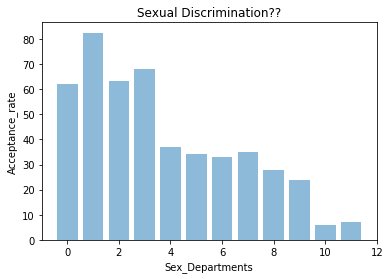

In [50]:
from matplotlib import pyplot as plt
%matplotlib inline
x_labels=[male_A, female_A, male_B, female_B, male_C, female_C, male_D, female_D, male_E, female_E, male_F, female_F]
plt.bar(np.arange(12), x_labels, align="center", alpha=0.5)
plt.xlabel("Sex_Departments")
plt.ylabel("Acceptance_rate")
plt.title("Sexual Discrimination??")
plt.show()

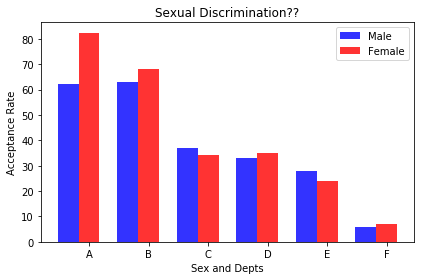

In [55]:
###Source Code from Matplotlib Bar Library

fig, ax = plt.subplots()
index = np.arange(6)
bar_width = 0.35
opacity = 0.8

means_male = [male_A, male_B, male_C, male_D, male_E, male_F]
means_female = [female_A, female_B, female_C, female_D, female_E, female_F]

rects1 = plt.bar(index, means_male, bar_width,
alpha=opacity,
color='b',
label='Male')
 
rects2 = plt.bar(index + bar_width, means_female, bar_width,
alpha=opacity,
color='r',
label='Female')
 
plt.xlabel('Sex and Depts')
plt.ylabel('Acceptance Rate')
plt.title('Sexual Discrimination??')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D', 'E', 'F'))
plt.legend()
 
plt.tight_layout()
plt.show()